In [1]:
# Limpiamos todas las variables
%reset -f


# Integrantes
|N° SIU| NOMBRE APELLIDO--------------| CORREO---------------------|
|-----|-------------------------------|----------------------------|
|a1904|	Marck Anthony Murillo Ronquillo| murillo.ronq.50c2@gmail.com|
|a1906|	Yandri Jair	Uchuari Gallardo| yandriuchuari@gmail.com|
|a1823|	Luis Alberto Santamaria Jimenez| santamaria.luigi@gmail.com|

# **TACO Trash -	[taco-trash-dataset](https://www.kaggle.com/datasets/kneroma/tacotrashdataset)**

### Tipo de problema : Detección
- objetivo detección de residuos: Utilizar imágenes para identificar la presencia de residuos. Este modelo puede ser útil para planificar limpiar y preservar estos espacios.​
- Entrenar un modelo para identificar la presencia de residuos plásticos en imágenes.

### Las diapositivas y el código deben contener:
- Descripción del problema que hay detrás del conjunto de datos.
- Análisis exploratorio del conjunto de datos.
- Tarea de visión por computadora a resolver y métricas a utilizar para evaluarla.
- Uso de Data Augmentation. Porque sí o porque no. Cuales se utilizaron y sus configuraciones.
- Arquitecturas de modelos a entrenar (al menos 2).
- Uso de Transfer Learning. Porque sí o porque no. En caso de utilizarlo a partir de que pesos de realizó.
- Entrenamientos realizados (al menos 4). Hiperparametros utilizados en cada uno.
- Gráficas de resultados y sus comparaciones.
- Conclusiones.




## EDA (Análisis exploratorio del dataset)

In [2]:
## descarga del dataset desde kagglehub
## Instalamos librerias 
#try:
#    import kagglehub
#    #import gdown
#    print("Todas las librerías ya están instaladas")
#except ImportError:
#    !pip install kagglehub
#    import kagglehub
#    #!pip install --upgrade --no-cache-dir gdown
#    print("Instalación completada")
##import kagglehub
#
## Download latest version
#path = kagglehub.dataset_download("kneroma/tacotrashdataset", force_download=True)
#
#print("Path to dataset files:", path)


In [3]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import numpy as np
import os
from collections import Counter
import seaborn as sns


In [4]:
! conda install gdown -y

Retrieving notices: done
Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [5]:
# Descarga del dataSet desde Repo en el Driver 
import os
import zipfile
import gdown

def descargar_y_preparar_dataset_taco(url_id_drive,carpeta_destino): 
    """
    Descarga un archivo ZIP de Google Drive
    """
    # 1. Verificar si la carpeta descomprimida ya existe
    if os.path.exists(carpeta_destino) and os.path.isdir(carpeta_destino) and os.listdir(carpeta_destino):
        print(f"El Dataset  '{carpeta_destino}' ya existe no se requiere descargar el miso .")
        return

    # 2. Descargar el archivo ZIP desde Google Drive
    try:
        ruta_zip_descargado = gdown.download(f"https://drive.google.com/uc?id={url_id_drive}", fuzzy=True)
        print(f"Descarga completada. Archivo guardado como: '{ruta_zip_descargado}'")

    except Exception as e:
        print(f"Error durante la descarga del archivo ZIP: {e}")
        return

    # 3. Descomprimir el archivo .zip
    try:
        with zipfile.ZipFile(ruta_zip_descargado, 'r') as zip_ref:
            zip_ref.extractall()
            print(f" Fin de la Descompresión  '{ruta_zip_descargado}")
    except Exception as e:
        print(f"Error durante la descompresión del archivo ZIP: {e}")
        return

    # 4. Borrar el archivo .zip después de la descompresión
    try:
        os.remove(ruta_zip_descargado)
        print(f"Archivo ZIP eliminado correctamente.... {ruta_zip_descargado}")
    except Exception as e:
        print(f"Error al intentar eliminar el archivo ZIP: {e}")


# --- Uso del código ---
# https://drive.google.com/file/d/1kFiYY3urHldf8E10mubslpoK1my61B0V/view?usp=drive_link
url_del_dataset = "1kFiYY3urHldf8E10mubslpoK1my61B0V"
carpeta_destino = "tacotrashdataset" # La carpeta donde se descomprimirá

descargar_y_preparar_dataset_taco(url_del_dataset, carpeta_destino)


/home/marck/anaconda3/envs/VpC_conda_env/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1kFiYY3urHldf8E10mubslpoK1my61B0V
From (redirected): https://drive.google.com/uc?id=1kFiYY3urHldf8E10mubslpoK1my61B0V&confirm=t&uuid=a258251f-7f07-45b5-bf0b-cb48b6c0e606
To: /home/marck/Documents/UBA/VpC2_Vision_por_computadora_2/CV-II/tacotrashdataset.zip
100%|██████████| 3.08G/3.08G [02:20<00:00, 21.9MB/s]


Descarga completada. Archivo guardado como: 'tacotrashdataset.zip'
 Fin de la Descompresión  'tacotrashdataset.zip
Archivo ZIP eliminado correctamente.... tacotrashdataset.zip


### **Verificación de contenido de archivos**

Como podemos observar a continuación en el dataset no tenemos una división en la estructura de las clases (etiqueta) y tenemos un total de 1500 archivos de imagen  .jpg  

In [6]:
# verificación de contenido de archivos 
import os
from collections import defaultdict 

def print_dir_tree(start_path, indent='  '):
    """
    Muestra el árbol de directorios 
    """
    print(f"Directorio: {start_path}")
    # Diccionario para contar extensiones
    extension_counts = defaultdict(int)
    base_level = start_path.rstrip(os.sep).count(os.sep)

    for root, dirs, files in os.walk(start_path):
        level = root.count(os.sep) - base_level
        subindent = indent * level
        folder_name = os.path.basename(root) + os.sep # Aseguramos que termine con el separador de directorio
        print('{}|-- {}'.format(subindent, folder_name))

        # Contar archivos y sus extensiones
        for file in files:
            _, ext = os.path.splitext(file)
            ext = ext.lower() if ext else '[sin extensión]'
            extension_counts[ext] += 1

    # Mostrar resumen de extensiones al final
    print("\nResumen de archivos por extensión:")
    for ext, count in sorted(extension_counts.items()):
        print(f"{ext or 'Sin extensión'} : {count}")

print_dir_tree('./tacotrashdataset')

Directorio: ./tacotrashdataset
|-- tacotrashdataset/
  |-- data/
    |-- batch_11/
    |-- batch_5/
    |-- batch_12/
    |-- batch_15/
    |-- batch_2/
    |-- batch_4/
    |-- batch_7/
    |-- batch_6/
    |-- batch_1/
    |-- batch_14/
    |-- batch_3/
    |-- batch_8/
    |-- batch_10/
    |-- batch_13/
    |-- batch_9/
  |-- versions/
    |-- 3/

Resumen de archivos por extensión:
.bin : 1
.complete : 1
.csv : 1
.jpg : 1500
.json : 1
.txt : 1
.zip : 1


### **Visualización de las imágenes**. 

Como podemos observar a continuación, se seleccionaron aleatoriamente seis imágenes para una inspección inicial de su contenido. El conjunto de datos combina imágenes de residuos de distintos tipos (plástico, metal, papel); sin embargo, notamos que algunas imágenes de residuos se mezclan con elementos no relacionados.

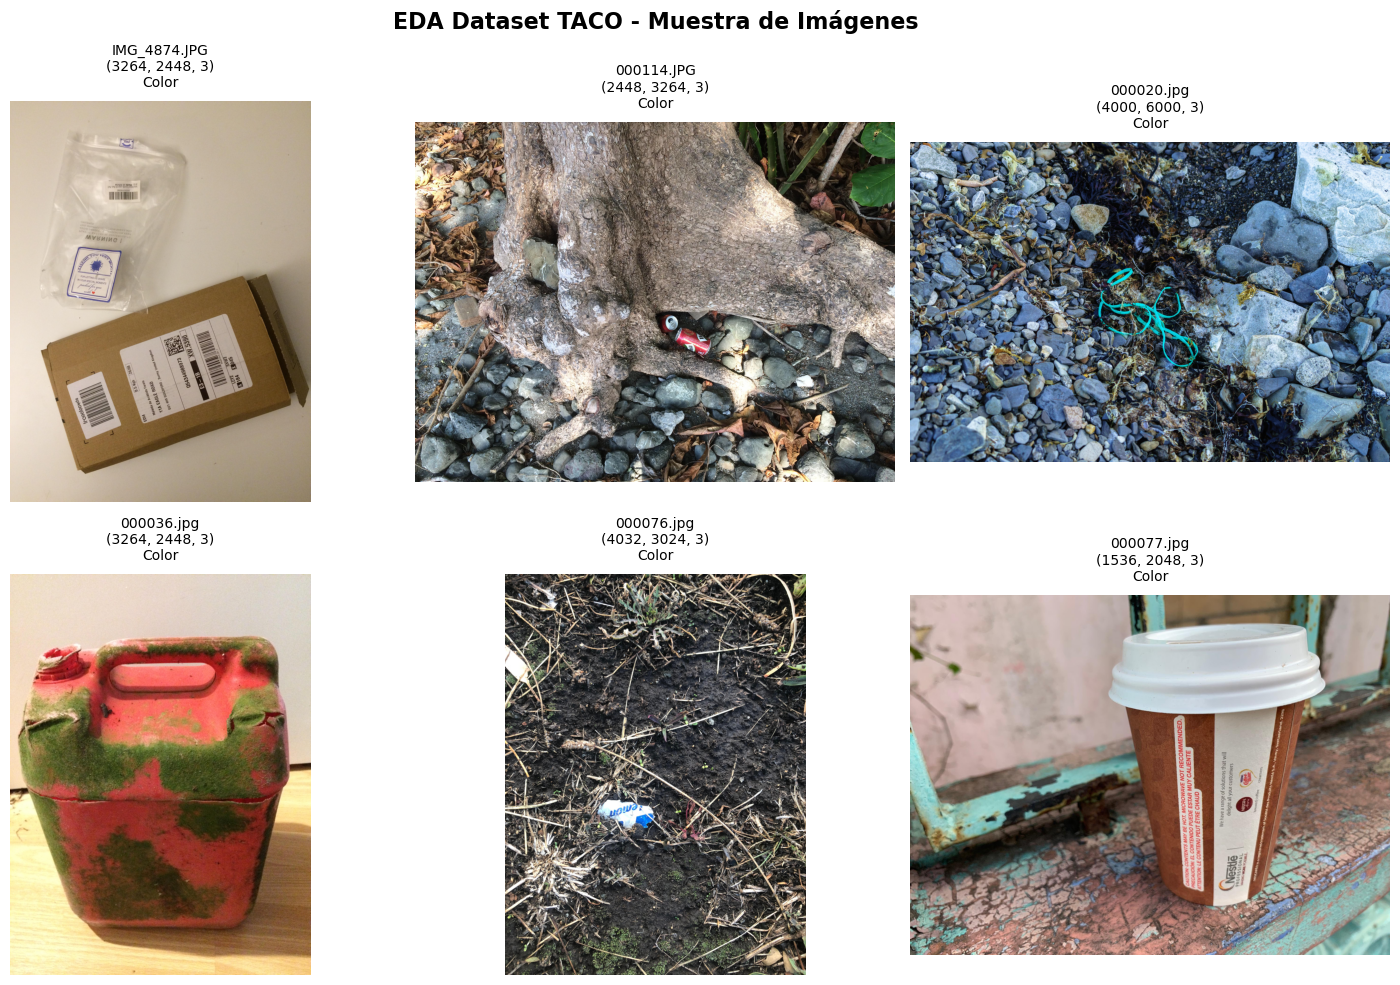

In [7]:
#import matplotlib.pyplot as plt
#import cv2
#from pathlib import Path

# Lista de archivos de imágenes
dataset_img ='./tacotrashdataset/data/'
imagen_files = [
    dataset_img+"batch_3/IMG_4874.JPG",
    dataset_img+"batch_7/000114.JPG",
    dataset_img+"batch_11/000020.jpg",
    dataset_img+"batch_11/000036.jpg",
    dataset_img+"batch_14/000076.jpg",
    dataset_img+"batch_15/000077.jpg"
]

def analizar_imagen(ruta_imagen):
    """
    Analiza una imagen y devuelve información básica
    """
    try:
        # Cargar imagen con OpenCV (BGR)
        imagen = cv2.imread(ruta_imagen)
        
        if imagen is None:
            return None, f"Error: No se pudo cargar {ruta_imagen}"
        
        # Convertir de BGR a RGB para matplotlib
        imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        
        # Obtener información básica
        nombre_archivo = Path(ruta_imagen).name
        dimensiones = imagen_rgb.shape
        
        # Verificar si es realmente escala de grises
        if len(imagen_rgb.shape) == 3:
            es_gris_real = (imagen_rgb[:,:,0] == imagen_rgb[:,:,1]).all() and \
                          (imagen_rgb[:,:,1] == imagen_rgb[:,:,2]).all()
        else:
            es_gris_real = True
        
        tipo_imagen = "Gris" if es_gris_real else "Color"
        
        # Crear título con información
        titulo = f"{nombre_archivo}\n{dimensiones}\n{tipo_imagen}"
        
        return imagen_rgb, titulo
        
    except Exception as e:
        return None, f"Error procesando {ruta_imagen}: {str(e)}"

def mostrar_dataset_imagenes():
    """
    Muestra las 6 imágenes del dataset en un grid 2x3
    """
    # Configurar el lienzo
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('EDA Dataset TACO - Muestra de Imágenes', fontsize=16, fontweight='bold')
    
    # Aplanar axes para fácil iteración
    axes = axes.flatten()
    
    for i, ruta_imagen in enumerate(imagen_files):
        imagen, titulo = analizar_imagen(ruta_imagen)
        
        if imagen is not None:
            # Mostrar imagen
            axes[i].imshow(imagen)
            axes[i].set_title(titulo, fontsize=10, pad=10)
            axes[i].axis('off')
        else:
            # Mostrar mensaje de error
            axes[i].text(0.5, 0.5, titulo, ha='center', va='center', 
                        transform=axes[i].transAxes, fontsize=10, color='red')
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()



mostrar_dataset_imagenes()

### **Gráficas representativas del dataSet taco-trash**

#### Cantidad de Imágenes. 
El dataset se compone de un total de 1500 imágenes en formato .jpg, dichas imágenes  están organizadas en quince directorios desde batch_1 hasta batch_15, Es importante destacar que, al observar esta estructura, los directorios por lotes no guardan una relación directa con las clases (etiquetas) de los objetos o tipos de residuos en las imágenes.

 _Esto implica que la información de las clases debe obtenerse de otra fuente (como metadatos, un archivo de anotaciones, o la estructura de directorios que uses para las clases finales, como "plástico", "metal", etc._


#### Distribución Color vs Gris 

- **Imágenes a Color vs. Escala de Grises (3 canales)**: Se llevó a cabo una contabilización para diferenciar las imágenes a color (típicamente RGB con 3 canales) de aquellas que, aunque siendo en escala de grises, pudieran estar representadas con 3 canales (lo cual a veces ocurre cuando se convierte una imagen a color a escala de grises manteniendo la estructura de 3 canales

- **Imágenes a Color vs. Escala de Grises (1 canal)**: Adicionalmente, se contabilizaron las imágenes a color frente a las imágenes en escala de gris con un único canal 

En ambos análisis, los resultados muestran que la totalidad de las imágenes del dataset esta a color

### Relación de Aspecto (Ancho y Alto)
Las gráficas muestran la distribución de los valores de alto y ancho de las imágenes indicando una amplia variabilidad en las dimensiones. Esta diversidad en las resoluciones y proporciones de las imágenes es una característica notable del dataset. 



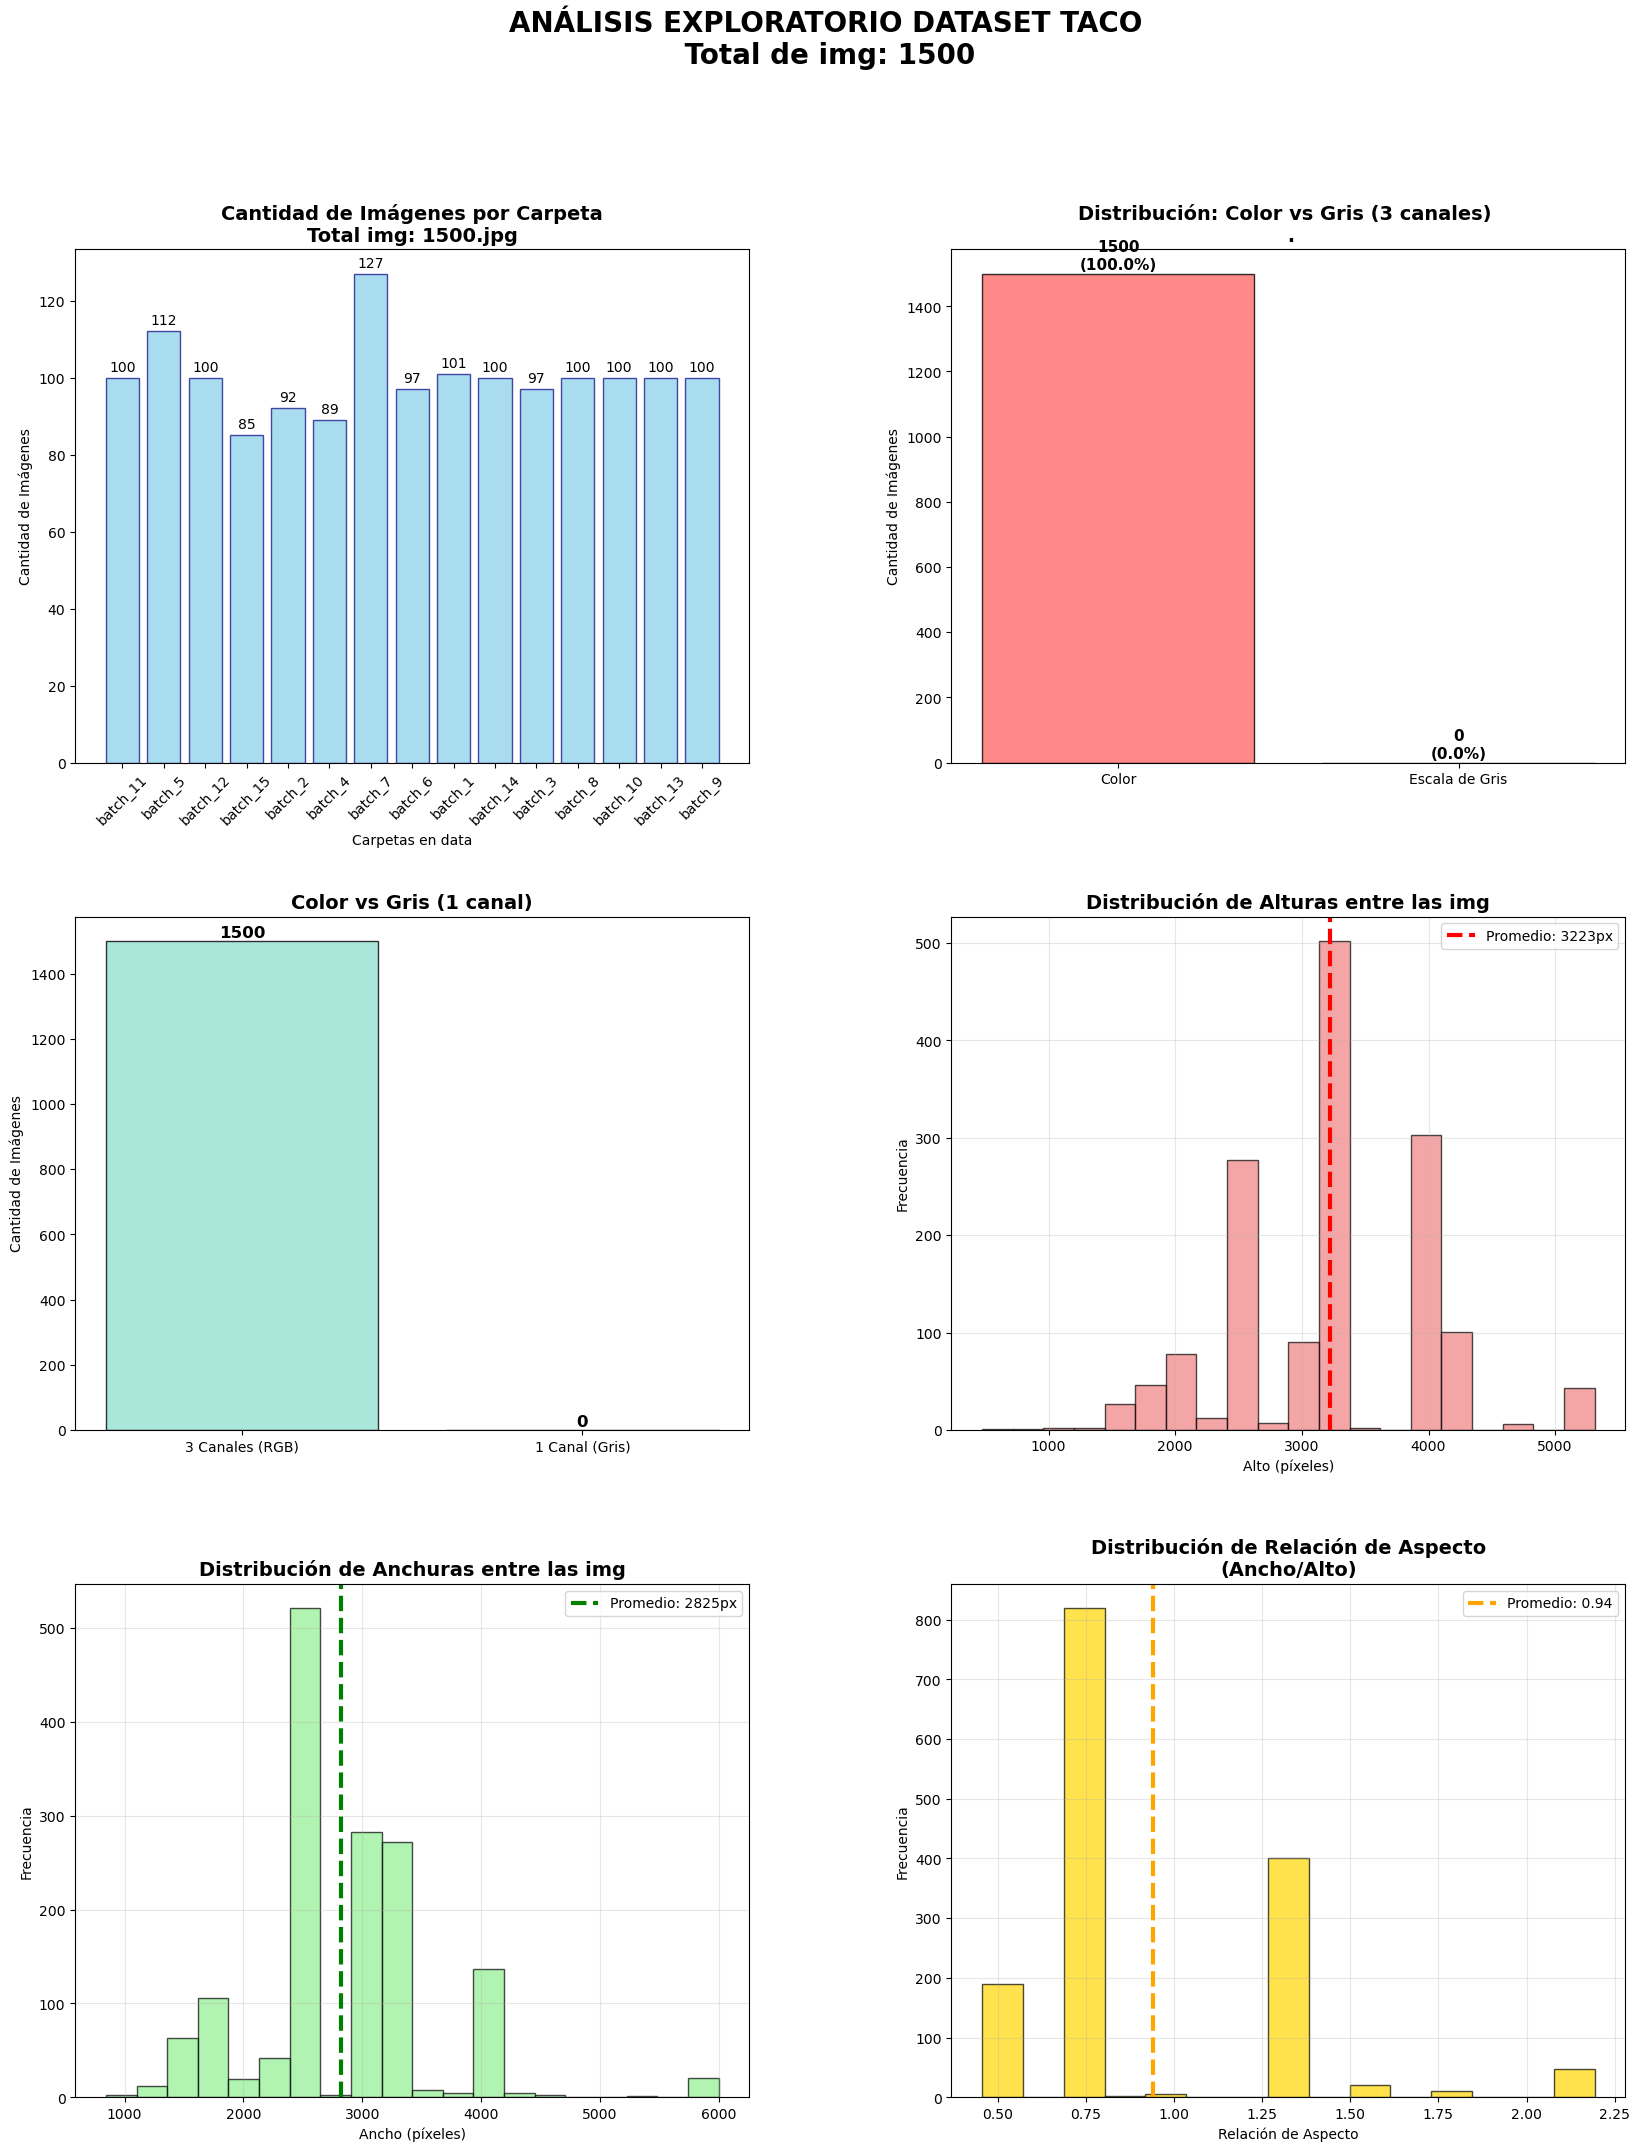

In [8]:
#import matplotlib.pyplot as plt
#import cv2
#import numpy as np
#import os
#from pathlib import Path
#from collections import Counter
#import seaborn as sns

# Configuración base del dataset
dataset_img = './tacotrashdataset/data/'

def explorar_dataset_completo():
    """
    Explora todo el dataset y recopila información para análisis
    """
    # Variables para almacenar información
    imagenes_por_carpeta = {}
    total_imagenes = 0
    imagenes_color = 0
    imagenes_gris_real = 0
    imagenes_3_canales = 0
    imagenes_1_canal = 0
    dimensiones_alto = []
    dimensiones_ancho = []
    relaciones_aspecto = []
    
    # Explorar todas las carpetas batch
    for carpeta in os.listdir(dataset_img):
        carpeta_path = os.path.join(dataset_img, carpeta)
        
        if os.path.isdir(carpeta_path) and carpeta.startswith('batch'):
            imagenes_en_carpeta = 0
            
            # Contar archivos .jpg en cada carpeta
            for archivo in os.listdir(carpeta_path):
                if archivo.lower().endswith(('.jpg', '.jpeg')):
                    archivo_path = os.path.join(carpeta_path, archivo)
                    
                    try:
                        # Cargar imagen
                        imagen = cv2.imread(archivo_path)
                        
                        if imagen is not None:
                            imagenes_en_carpeta += 1
                            total_imagenes += 1
                            
                            # Convertir a RGB
                            imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
                            
                            # Analizar canales
                            if len(imagen_rgb.shape) == 3:
                                imagenes_3_canales += 1
                                # Verificar si es realmente color o gris
                                es_gris_real = (imagen_rgb[:,:,0] == imagen_rgb[:,:,1]).all() and \
                                              (imagen_rgb[:,:,1] == imagen_rgb[:,:,2]).all()
                                if es_gris_real:
                                    imagenes_gris_real += 1
                                else:
                                    imagenes_color += 1
                            else:
                                imagenes_1_canal += 1
                                imagenes_gris_real += 1
                            
                            # Dimensiones
                            alto, ancho = imagen_rgb.shape[:2]
                            dimensiones_alto.append(alto)
                            dimensiones_ancho.append(ancho)
                            
                            # Relación de aspecto
                            relacion = ancho / alto
                            relaciones_aspecto.append(relacion)
                            
                    except Exception as e:
                        print(f"Error procesando {archivo_path}: {e}")
            
            if imagenes_en_carpeta > 0:
                imagenes_por_carpeta[carpeta] = imagenes_en_carpeta
    
    return {
        'imagenes_por_carpeta': imagenes_por_carpeta,
        'total_imagenes': total_imagenes,
        'imagenes_color': imagenes_color,
        'imagenes_gris_real': imagenes_gris_real,
        'imagenes_3_canales': imagenes_3_canales,
        'imagenes_1_canal': imagenes_1_canal,
        'dimensiones_alto': dimensiones_alto,
        'dimensiones_ancho': dimensiones_ancho,
        'relaciones_aspecto': relaciones_aspecto
    }

def crear_graficas_eda(datos):
    """
    Crea todas las gráficas del EDA en un solo lienzo
    """
    # Configurar el lienzo con subplots
    fig = plt.figure(figsize=(20, 24))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Título principal
    fig.suptitle(f'ANÁLISIS EXPLORATORIO DATASET TACO\n Total de img: {datos["total_imagenes"]}', fontsize=20, fontweight='bold', y=0.98)
    
    # 1. Gráfica de barras: Imágenes por carpeta
    ax1 = fig.add_subplot(gs[0, 0])
    carpetas = list(datos['imagenes_por_carpeta'].keys())
    cantidades = list(datos['imagenes_por_carpeta'].values())
    
    bars1 = ax1.bar(carpetas, cantidades, color='skyblue', edgecolor='navy', alpha=0.7)
    ax1.set_title(f'Cantidad de Imágenes por Carpeta\nTotal img: {datos["total_imagenes"]}.jpg', 
                  fontsize=14, fontweight='bold')
    ax1.set_xlabel('Carpetas en data')
    ax1.set_ylabel('Cantidad de Imágenes')
    ax1.tick_params(axis='x', rotation=45)
    
    # Añadir valores en las barras
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)
    
    # 2. Gráfica de barras: Color vs Gris 3 channel 
    ax2 = fig.add_subplot(gs[0, 1])
    tipos = ['Color', 'Escala de Gris']
    cantidades_tipo = [datos['imagenes_color'], datos['imagenes_gris_real']]
    colors2 = ['#FF6B6B', '#4ECDC4']
    
    bars2 = ax2.bar(tipos, cantidades_tipo, color=colors2, edgecolor='black', alpha=0.8)
    ax2.set_title(f'Distribución: Color vs Gris (3 canales) \n .', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Cantidad de Imágenes')
    
    # Añadir porcentajes
    total = sum(cantidades_tipo)
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        porcentaje = (height/total)*100
        ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height)}\n({porcentaje:.1f}%)', ha='center', va='bottom', 
                fontsize=11, fontweight='bold')
    
    # 3. Gráfica de barras: 3 canales vs 1 canal
    ax3 = fig.add_subplot(gs[1, 0])
    canales = ['3 Canales (RGB)', '1 Canal (Gris)']
    cantidades_canales = [datos['imagenes_3_canales'], datos['imagenes_1_canal']]
    colors3 = ['#95E1D3', '#F38BA8']
    
    bars3 = ax3.bar(canales, cantidades_canales, color=colors3, edgecolor='black', alpha=0.8)
    ax3.set_title('Color vs Gris (1 canal)', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Cantidad de Imágenes')
    
    # Añadir valores
    for bar in bars3:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # 4. Histograma: Distribución de alturas con promedio
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.hist(datos['dimensiones_alto'], bins=20, color='lightcoral', alpha=0.7, edgecolor='black')
    promedio_alto = np.mean(datos['dimensiones_alto'])
    ax4.axvline(promedio_alto, color='red', linestyle='--', linewidth=3, 
                label=f'Promedio: {promedio_alto:.0f}px')
    ax4.set_title('Distribución de Alturas entre las img', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Alto (píxeles)')
    ax4.set_ylabel('Frecuencia')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Histograma: Distribución de anchuras con promedio
    ax5 = fig.add_subplot(gs[2, 0])
    ax5.hist(datos['dimensiones_ancho'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
    promedio_ancho = np.mean(datos['dimensiones_ancho'])
    ax5.axvline(promedio_ancho, color='green', linestyle='--', linewidth=3,
                label=f'Promedio: {promedio_ancho:.0f}px')
    ax5.set_title('Distribución de Anchuras entre las img', fontsize=14, fontweight='bold')
    ax5.set_xlabel('Ancho (píxeles)')
    ax5.set_ylabel('Frecuencia')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Gráfica adicional: Relación de aspecto
    ax6 = fig.add_subplot(gs[2, 1])
    ax6.hist(datos['relaciones_aspecto'], bins=15, color='gold', alpha=0.7, edgecolor='black')
    promedio_relacion = np.mean(datos['relaciones_aspecto'])
    ax6.axvline(promedio_relacion, color='orange', linestyle='--', linewidth=3,
                label=f'Promedio: {promedio_relacion:.2f}')
    ax6.set_title('Distribución de Relación de Aspecto\n(Ancho/Alto)', 
                  fontsize=14, fontweight='bold')
    ax6.set_xlabel('Relación de Aspecto')
    ax6.set_ylabel('Frecuencia')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    

    #plt.tight_layout()
    plt.show()



## Ejecutar análisis completo
#if __name__ == "__main__":
#    # Explorar dataset para la gráfica 
#    datos_dataset = explorar_dataset_completo()
#
#    # Crear gráficas
#    crear_graficas_eda(datos_dataset)

# Explorar dataset para la gráfica 
datos_dataset = explorar_dataset_completo()
# Crear gráficas
crear_graficas_eda(datos_dataset)

## Análisis de clases


El conjunto de datos se compone de 4.784 filas donde cada fila representa un objeto anotado en una imagen, con información tanto de la imagen como de la categoría y la ubicación del objeto. Además presenta 13 columnas, las cuales son las siguientes:

* **img_id**: ID numérico de la imagen (asignado en el dataset). Mismo valor para todas las anotaciones de esa imagen.
* **img_width**: Ancho de la imagen en píxeles.
* **img_height**: Alto de la imagen en píxeles.
* **img_file**: Ruta o nombre de archivo de la imagen dentro del dataset.
* **cat_id**: ID numérico de la categoría a la que pertenece el objeto anotado.
* **cat_name**: Nombre específico de la categoría (ej. “Glass bottle”).
* **supercategory**: Categoría general a la que pertenece la subcategoría (ej. “Bottle”).
* **ann_id**: ID único de la anotación (cada objeto marcado en una imagen).
* **x	Coordenada**: X de la esquina superior izquierda de la caja delimitadora (bounding box).
* **y	Coordenada**: Y de la esquina superior izquierda de la caja delimitadora.
* **width**: Ancho de la caja delimitadora en píxeles.
* **height**: Alto de la caja delimitadora en píxeles.
* **area**: Área del objeto anotado en píxeles cuadrados (generalmente width * height, aunque puede ser un área ajustada si hay rotación o segmentación precisa).




El conjunto de datos cuenta con una [página con estadísticas](http://tacodataset.org/stats) en donde se reportó:
* Cantidad de anotaciones por clases, obtenienddo que las 3 anotaciones más repetidas fueron "Cigarette", "Unlabeled litter" y "Plastic film". Las anotaciones menos repetidas fueron "plastified paper bag", "Carded blister pack" y "Battery"
* Cantidad de anotaciones por super clase, siendo las 4 más comunes "Plastic bag & wrapper", "Cigarette", "Unlabeled litter" y "Bottle". Mientras las menos comunes fueron "Battery", "Plastic gloves" y "Glass jar"
* Proporción de elementos en las imágenes. Siendo "Vegetation" (vegetación) y "Sand, Dirt and Pebbles" (Arena, tierra y guijarros) las mas presentes. Y los elemento de "clean" (limpieza) y "trash" (basura) los menos presentes.

In [9]:
import pandas as pd

taco_df = pd.read_csv('tacotrashdataset/versions/3/meta_df.csv')
taco_df.head()

img_id  img_width  img_height            img_file  cat_id  \
0       0       1537        2049  batch_1/000006.jpg       6   
1       1       1537        2049  batch_1/000008.jpg      18   
2       1       1537        2049  batch_1/000008.jpg      14   
3       2       1537        2049  batch_1/000010.jpg       5   
4       2       1537        2049  batch_1/000010.jpg       7   

               cat_name supercategory  ann_id      x      y   width  height  \
0          Glass bottle        Bottle       1  517.0  127.0   447.0  1322.0   
1           Meal carton        Carton       2    1.0  457.0  1429.0  1519.0   
2          Other carton        Carton       3  531.0  292.0  1006.0   672.0   
3  Clear plastic bottle        Bottle       4  632.0  987.0   500.0   374.0   
4    Plastic bottle cap    Bottle cap       5  632.0  989.0    44.0    51.0   

        area  
0   403954.0  
1  1071259.5  
2    99583.5  
3    73832.5  
4      915.0

Primero responder si hay un desbalance de clases (hay alguna clase que se repite más). Según se pudo leer en la web del conjunto de datos eso es asi, pero se verificará nuevamente

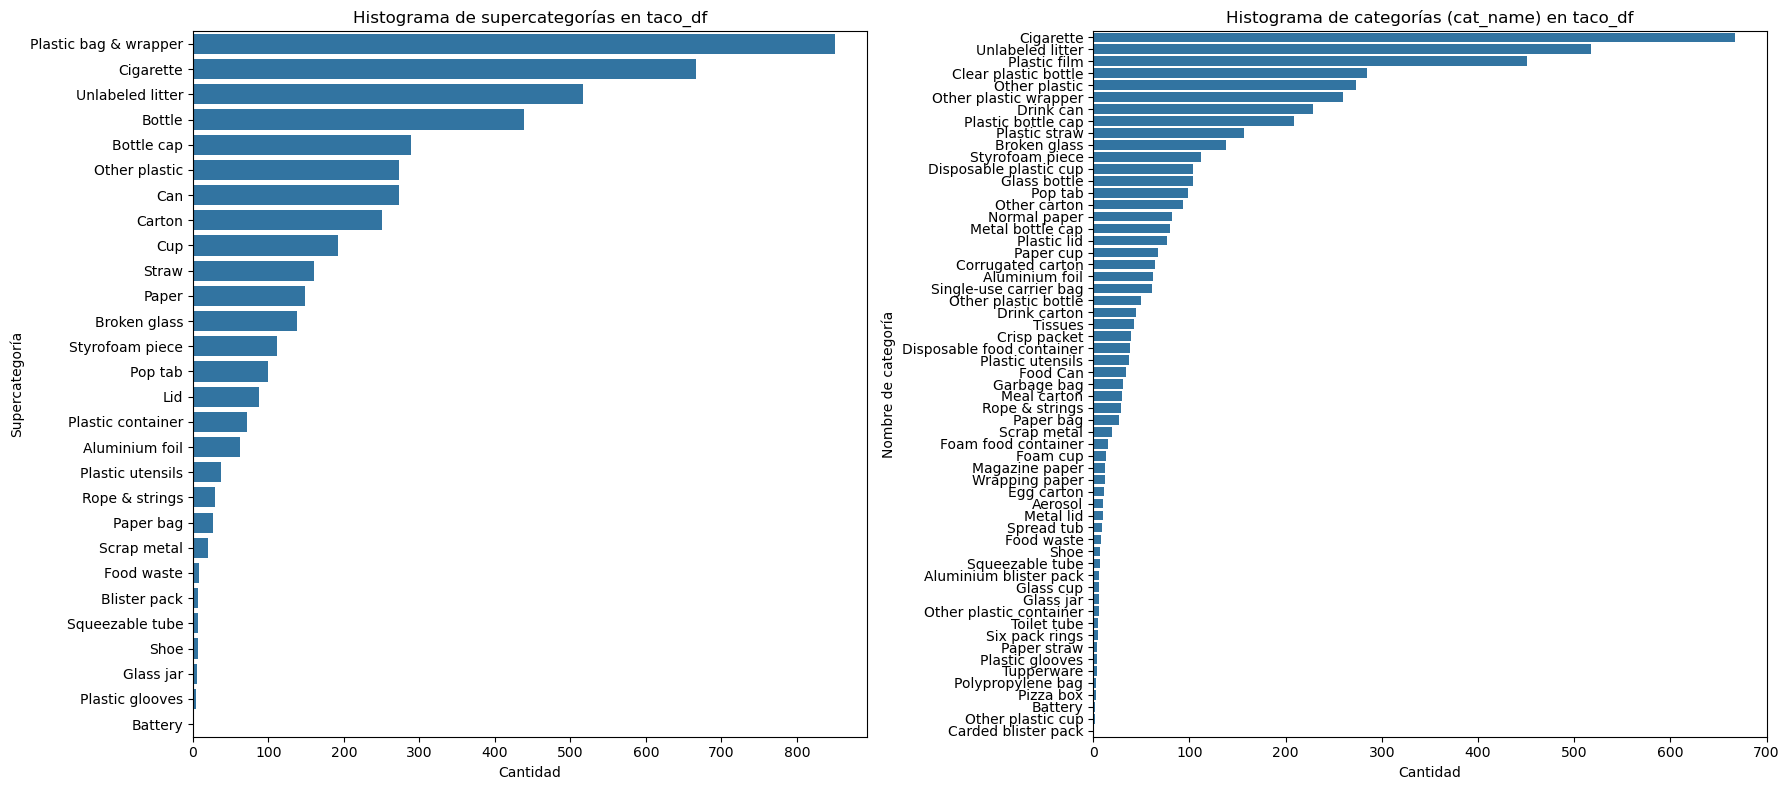

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Histograma de supercategorías
sns.countplot(data=taco_df, y='supercategory', order=taco_df['supercategory'].value_counts().index, ax=axes[0])
axes[0].set_title('Histograma de supercategorías en taco_df')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Supercategoría')

# Histograma de categorías (cat_name)
sns.countplot(data=taco_df, y='cat_name', order=taco_df['cat_name'].value_counts().index, ax=axes[1])
axes[1].set_title('Histograma de categorías (cat_name) en taco_df')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Nombre de categoría')

plt.tight_layout()
plt.show()

Como se observa el dataset empleado presenta el mismo desbalance de clases observado en los gráficos en la página de TACO

In [11]:
# Agrupar por 'img_file' y contar los elementos únicos de 'cat_id' por imagen
conteo_cat_id_por_imagen = taco_df.groupby('img_file')['cat_id'].count().reset_index(name='cantidad_cat_id')
conteo_cat_id_por_imagen.head()

img_file  cantidad_cat_id
0  batch_1/000000.jpg                1
1  batch_1/000001.jpg                2
2  batch_1/000003.jpg                1
3  batch_1/000004.jpg                1
4  batch_1/000005.jpg                1

In [12]:
conteo_cat_id_por_imagen.describe()

cantidad_cat_id
count      1500.000000
mean          3.189333
std           4.691712
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          90.000000

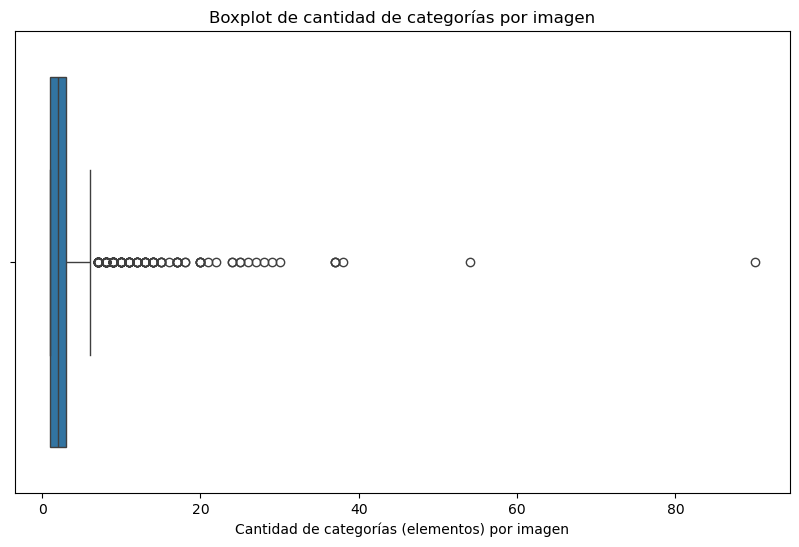

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=conteo_cat_id_por_imagen['cantidad_cat_id'])
plt.title('Boxplot de cantidad de categorías por imagen')
plt.xlabel('Cantidad de categorías (elementos) por imagen')
plt.show()

En el boxplot anterior se puede apreciar que los *outliers* tienen valores muy alejados de la media. Por lo que se procede a revisar esos casos y evaluar si deberían mantenerse.

In [14]:
# Definir outliers usando el método del rango intercuartílico (IQR)
Q1 = conteo_cat_id_por_imagen['cantidad_cat_id'].quantile(0.25)
Q3 = conteo_cat_id_por_imagen['cantidad_cat_id'].quantile(0.75)
IQR = Q3 - Q1

# Umbrales para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = conteo_cat_id_por_imagen[
    (conteo_cat_id_por_imagen['cantidad_cat_id'] < lower_bound) |
    (conteo_cat_id_por_imagen['cantidad_cat_id'] > upper_bound)
]

# Listar los img_file de los outliers
outlier_img_files = outliers['img_file'].tolist()
len(outlier_img_files)
# print("Outliers encontrados:", outlier_img_files)

153

In [15]:
print("Cantidad de imagenes que contienen más de 20 elementos:", len(conteo_cat_id_por_imagen[conteo_cat_id_por_imagen['cantidad_cat_id'] > 20]))
print("Cantidad de imagenes que contienen más de 30 elementos:", len(conteo_cat_id_por_imagen[conteo_cat_id_por_imagen['cantidad_cat_id'] > 30]))
print("Cantidad de imagenes que contienen más de 40 elementos:", len(conteo_cat_id_por_imagen[conteo_cat_id_por_imagen['cantidad_cat_id'] > 40]))



Cantidad de imagenes que contienen más de 20 elementos: 17
Cantidad de imagenes que contienen más de 30 elementos: 6
Cantidad de imagenes que contienen más de 40 elementos: 2


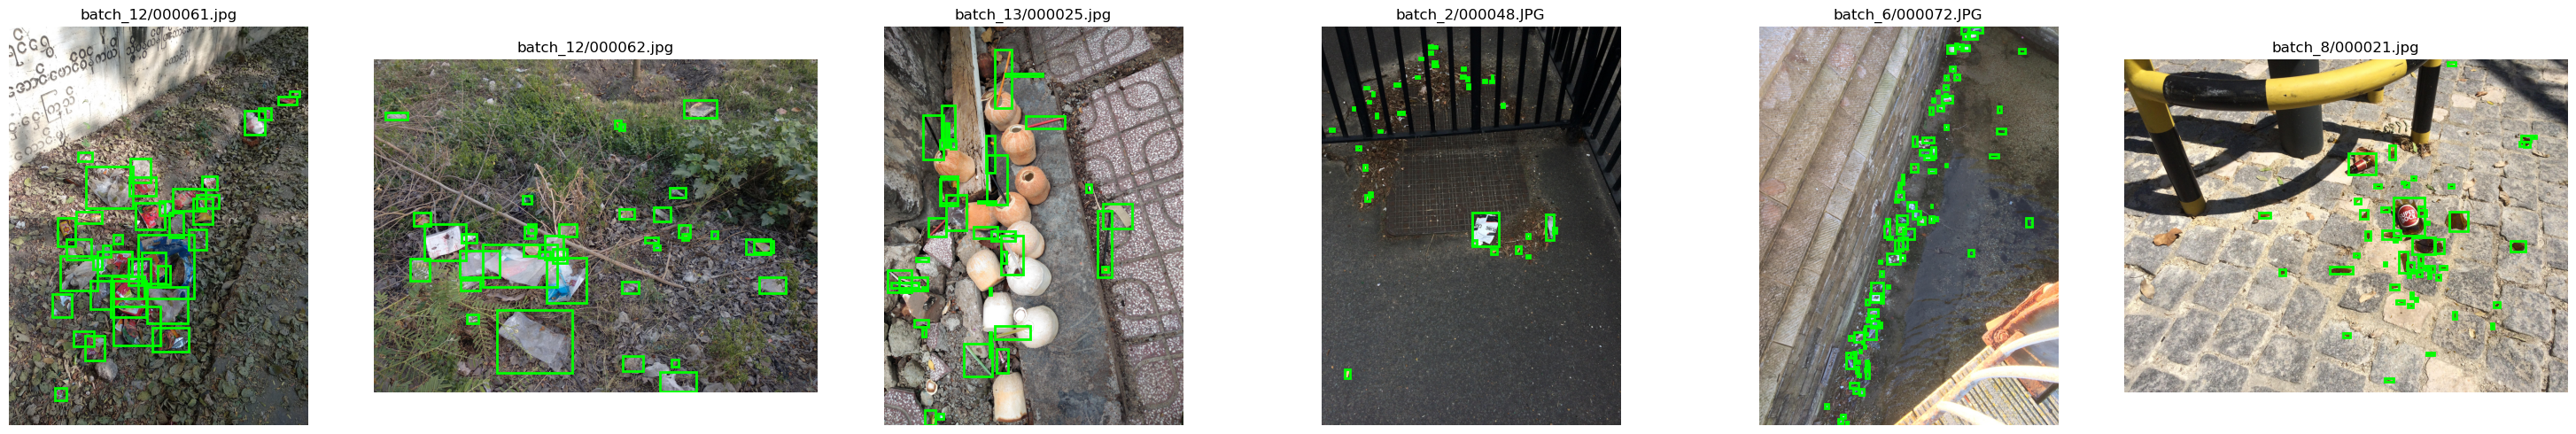

In [24]:
from matplotlib.patches import Rectangle
img_mas_30 = conteo_cat_id_por_imagen[conteo_cat_id_por_imagen['cantidad_cat_id'] > 30]

# Mostrar las imágenes con recuadros verdes para cada item anotado
fig, axes = plt.subplots(1, len(img_mas_30), figsize=(5 * len(img_mas_30), 5))
if len(img_mas_30) == 1:
    axes = [axes]

for ax, img_file in zip(axes, img_mas_30['img_file']):
    img_path = 'tacotrashdataset/data/'+img_file
    img = cv2.imread(img_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(img_file)
        ax.axis('off')
        
        # Filtrar anotaciones para la imagen actual
        items = taco_df[taco_df['img_file'] == img_file]
        for _, row in items.iterrows():
            x, y, w, h = row['x'], row['y'], row['width'], row['height']
            rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)
    else:
        ax.text(0.5, 0.5, f"No se pudo cargar\n{img_file}", ha='center', va='center')
        ax.axis('off')

plt.tight_layout()
plt.show()

Se observa que estas imágenes con demasiados elementos pueden llegar a ser confusas para el modelo.